# CodeStates AI Section2 Project

AI_15_정경재

- Project : Hypertension Predictive Model
- 프로젝트 : 한국형 고혈압 예측 모델 개발
    - 고혈압 진단기준에 따른 차이가 있을까?

# Data preparation

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

## 1. DATA 불러오기
- .sas7bdat -> csv(한국어) -> csv(utf-8) -> pandas

In [2]:
raw_2019 = pd.read_csv('data/2019_utf8.csv')
raw_2019.shape

C:\Users\dankj\AppData\Local\Temp\ipykernel_12408\1737483443.py:1: DtypeWarning: Columns (111,317,333,387,406,512,522,534,663,666) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_2019 = pd.read_csv('data/2019_utf8.csv')


(8110, 831)

In [3]:
raw_2020 = pd.read_csv('data/2020_utf8.csv')
raw_2020.shape

C:\Users\dankj\AppData\Local\Temp\ipykernel_12408\608837769.py:1: DtypeWarning: Columns (140,192,301,360,480,490,502,594,597) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_2020 = pd.read_csv('data/2020_utf8.csv')


(7359, 762)

## 2. Feature & Target 정의, 추출, 병합

In [4]:
demo_list = ['ID',
             'year',
             'sex',
             'age']
ques_list = ['DI1_2',
             'DI2_2',
             'DE1_31',
             'DE1_32',
             'DE1_dg',
             'BD1_11',
             'BD2_1',
             'sm_presnt']
exam_list = ['HE_HPfh1',
             'HE_HPfh2',
             'HE_sbp',
             'HE_dbp',
             'HE_wt',
             'HE_wc',
             'HE_BMI',
             'HE_glu',
             'HE_HbA1c',
             'HE_chol',
             'HE_TG']
column_list = demo_list+ques_list+exam_list
column_list

['ID',
 'year',
 'sex',
 'age',
 'DI1_2',
 'DI2_2',
 'DE1_31',
 'DE1_32',
 'DE1_dg',
 'BD1_11',
 'BD2_1',
 'sm_presnt',
 'HE_HPfh1',
 'HE_HPfh2',
 'HE_sbp',
 'HE_dbp',
 'HE_wt',
 'HE_wc',
 'HE_BMI',
 'HE_glu',
 'HE_HbA1c',
 'HE_chol',
 'HE_TG']

In [5]:
raw2_2019 = raw_2019[column_list]
raw2_2020 = raw_2020[column_list]
print(raw2_2019.shape)
print(raw2_2020.shape)

(8110, 23)
(7359, 23)


In [6]:
raw_data = pd.concat([raw2_2019,raw2_2020],ignore_index=True)
raw_data.shape

(15469, 23)

In [7]:
raw_data.ID.duplicated().sum()

0

## 3. 결측치 제거

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15469 entries, 0 to 15468
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         15469 non-null  object
 1   year       15469 non-null  int64 
 2   sex        15469 non-null  int64 
 3   age        15469 non-null  int64 
 4   DI1_2      15469 non-null  object
 5   DI2_2      15469 non-null  object
 6   DE1_31     15469 non-null  object
 7   DE1_32     15469 non-null  object
 8   DE1_dg     15469 non-null  object
 9   BD1_11     15469 non-null  object
 10  BD2_1      15469 non-null  object
 11  sm_presnt  15469 non-null  object
 12  HE_HPfh1   15469 non-null  object
 13  HE_HPfh2   15469 non-null  object
 14  HE_sbp     15469 non-null  object
 15  HE_dbp     15469 non-null  object
 16  HE_wt      15469 non-null  object
 17  HE_wc      15469 non-null  object
 18  HE_BMI     15469 non-null  object
 19  HE_glu     15469 non-null  object
 20  HE_HbA1c   15469 non-null  o

In [9]:
def fillnan(value):
    if value == '.':
        value = np.nan
    return value
nanfill = raw_data.copy()
filled = nanfill.applymap(fillnan)
filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15469 entries, 0 to 15468
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         15469 non-null  object
 1   year       15469 non-null  int64 
 2   sex        15469 non-null  int64 
 3   age        15469 non-null  int64 
 4   DI1_2      14802 non-null  object
 5   DI2_2      14802 non-null  object
 6   DE1_31     14802 non-null  object
 7   DE1_32     14802 non-null  object
 8   DE1_dg     14802 non-null  object
 9   BD1_11     14802 non-null  object
 10  BD2_1      14802 non-null  object
 11  sm_presnt  12048 non-null  object
 12  HE_HPfh1   13409 non-null  object
 13  HE_HPfh2   13409 non-null  object
 14  HE_sbp     13479 non-null  object
 15  HE_dbp     13479 non-null  object
 16  HE_wt      14760 non-null  object
 17  HE_wc      14073 non-null  object
 18  HE_BMI     14659 non-null  object
 19  HE_glu     13101 non-null  object
 20  HE_HbA1c   13097 non-null  o

In [10]:
fix1 = filled.copy()
fix1.iloc[:,1:] = fix1.iloc[:,1:].apply(pd.to_numeric)
fix1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15469 entries, 0 to 15468
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         15469 non-null  object 
 1   year       15469 non-null  int64  
 2   sex        15469 non-null  int64  
 3   age        15469 non-null  int64  
 4   DI1_2      14802 non-null  float64
 5   DI2_2      14802 non-null  float64
 6   DE1_31     14802 non-null  float64
 7   DE1_32     14802 non-null  float64
 8   DE1_dg     14802 non-null  float64
 9   BD1_11     14802 non-null  float64
 10  BD2_1      14802 non-null  float64
 11  sm_presnt  12048 non-null  float64
 12  HE_HPfh1   13409 non-null  float64
 13  HE_HPfh2   13409 non-null  float64
 14  HE_sbp     13479 non-null  float64
 15  HE_dbp     13479 non-null  float64
 16  HE_wt      14760 non-null  float64
 17  HE_wc      14073 non-null  float64
 18  HE_BMI     14659 non-null  float64
 19  HE_glu     13101 non-null  float64
 20  HE_HbA

In [11]:
fix2 = fix1.copy()
fix2 = fix2.dropna().reset_index(drop=True)
fix2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         11573 non-null  object 
 1   year       11573 non-null  int64  
 2   sex        11573 non-null  int64  
 3   age        11573 non-null  int64  
 4   DI1_2      11573 non-null  float64
 5   DI2_2      11573 non-null  float64
 6   DE1_31     11573 non-null  float64
 7   DE1_32     11573 non-null  float64
 8   DE1_dg     11573 non-null  float64
 9   BD1_11     11573 non-null  float64
 10  BD2_1      11573 non-null  float64
 11  sm_presnt  11573 non-null  float64
 12  HE_HPfh1   11573 non-null  float64
 13  HE_HPfh2   11573 non-null  float64
 14  HE_sbp     11573 non-null  float64
 15  HE_dbp     11573 non-null  float64
 16  HE_wt      11573 non-null  float64
 17  HE_wc      11573 non-null  float64
 18  HE_BMI     11573 non-null  float64
 19  HE_glu     11573 non-null  float64
 20  HE_HbA

## 4. Target Data 생성

In [12]:
target_list = ['DI1_2','HE_sbp','HE_dbp']
target_df = fix2[target_list]
target_df.head()

,DI1_2,HE_sbp,HE_dbp
0,1.0,122.0,84.0
1,8.0,111.0,73.0
2,8.0,125.0,85.0
3,8.0,109.0,77.0
4,1.0,131.0,77.0


In [13]:
bp_drug = []
for i in fix2.DI1_2:
    if i < 5:
        bp_drug.append(1)
    else:
        bp_drug.append(0)
bp_drug = np.array(bp_drug)

target_df2 = target_df.copy()
target_df2['bp_drug'] = bp_drug
target_df2.head()

,DI1_2,HE_sbp,HE_dbp,bp_drug
0,1.0,122.0,84.0,1
1,8.0,111.0,73.0,0
2,8.0,125.0,85.0,0
3,8.0,109.0,77.0,0
4,1.0,131.0,77.0,1


In [14]:
hbp_us = []
for i in range(len(target_df2)):
    if (target_df2.loc[i,'HE_sbp']<130) & (target_df2.loc[i,'HE_dbp']<80) & (target_df2.loc[i,'bp_drug']==0):
        hbp_us.append(0)
    else:
        hbp_us.append(1)
hbp_us = np.array(hbp_us)
target_df3 = target_df2.copy()
target_df3['HBP_US'] = hbp_us
target_df3.head()

,DI1_2,HE_sbp,HE_dbp,bp_drug,HBP_US
0,1.0,122.0,84.0,1,1
1,8.0,111.0,73.0,0,0
2,8.0,125.0,85.0,0,1
3,8.0,109.0,77.0,0,0
4,1.0,131.0,77.0,1,1


In [15]:
hbp_eu = []
for i in range(len(target_df2)):
    if (target_df2.loc[i,'HE_sbp']<140) & (target_df2.loc[i,'HE_dbp']<90) & (target_df2.loc[i,'bp_drug']==0):
        hbp_eu.append(0)
    else:
        hbp_eu.append(1)
hbp_eu = np.array(hbp_eu)
target_df4 = target_df3.copy()
target_df4['HBP_EU'] = hbp_eu
target_df4.head()

,DI1_2,HE_sbp,HE_dbp,bp_drug,HBP_US,HBP_EU
0,1.0,122.0,84.0,1,1,1
1,8.0,111.0,73.0,0,0,0
2,8.0,125.0,85.0,0,1,0
3,8.0,109.0,77.0,0,0,0
4,1.0,131.0,77.0,1,1,1


In [16]:
target_df4.shape

(11573, 6)

In [17]:
target_df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DI1_2    11573 non-null  float64
 1   HE_sbp   11573 non-null  float64
 2   HE_dbp   11573 non-null  float64
 3   bp_drug  11573 non-null  int32  
 4   HBP_US   11573 non-null  int32  
 5   HBP_EU   11573 non-null  int32  
dtypes: float64(3), int32(3)
memory usage: 407.0 KB


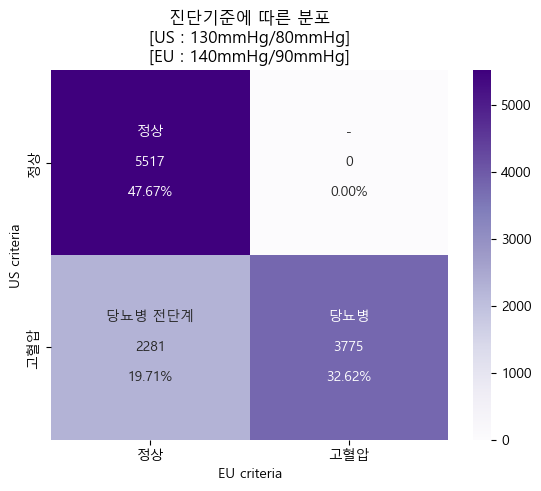

In [18]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(target_df4.HBP_US,target_df4.HBP_EU)
group_names = ['정상','-','당뇨병 전단계','당뇨병']
group_counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cfm.flatten()/np.sum(cfm)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
tick = ['정상','고혈압']
sns.heatmap(cfm, annot=labels, fmt='',cmap='Purples',xticklabels=tick,yticklabels=tick)
plt.xlabel('EU criteria')
plt.ylabel('US criteria')
plt.title('진단기준에 따른 분포\n[US : 130mmHg/80mmHg]\n[EU : 140mmHg/90mmHg]')
plt.show()

## 5. Feature Engineering

In [19]:
fix2.shape

(11573, 23)

In [20]:
feature_df = fix2.drop(columns=target_list,axis=1)
feature_df.shape

(11573, 20)

In [21]:
feature_df0 = feature_df[demo_list]
feature_df0.columns = ['ID','year','sex','age']
feature_df0.sample(5,random_state=42)

,ID,year,sex,age
5379,N760288401,2019,2,53
3912,H790227201,2019,1,42
7093,A835210202,2020,2,52
6998,A831291801,2020,1,66
5769,O763317302,2019,2,67


In [22]:
heavy_drink = []
for i in range(len(feature_df)):
    if (feature_df.loc[i,'sex']==1) & (feature_df.loc[i,'BD1_11'] in [3,4,5,6]) & (feature_df.loc[i,'BD2_1'] in [4,5]):
        heavy_drink.append(1)
    elif (feature_df.loc[i,'sex']==2) & (feature_df.loc[i,'BD1_11'] in [3,4,5,6]) & (feature_df.loc[i,'BD2_1'] in [3,4,5]):
        heavy_drink.append(1)
    else:
        heavy_drink.append(0)
heavy_drink = np.array(heavy_drink)

feature_df1 = feature_df0.copy()
feature_df1['heavy_drink'] = heavy_drink
feature_df1.sample(5,random_state=42)

,ID,year,sex,age,heavy_drink
5379,N760288401,2019,2,53,0
3912,H790227201,2019,1,42,1
7093,A835210202,2020,2,52,0
6998,A831291801,2020,1,66,1
5769,O763317302,2019,2,67,0


In [23]:
feature_df2 = feature_df1.copy()
feature_df2['smoke'] = feature_df['sm_presnt'].astype(int)
feature_df2.sample(5,random_state=42)

,ID,year,sex,age,heavy_drink,smoke
5379,N760288401,2019,2,53,0,0
3912,H790227201,2019,1,42,1,0
7093,A835210202,2020,2,52,0,0
6998,A831291801,2020,1,66,1,0
5769,O763317302,2019,2,67,0,0


In [24]:
genetic = []
for i in range(len(feature_df)):
    if (feature_df.loc[i,'HE_HPfh1']==1) & (feature_df.loc[i,'HE_HPfh2']==1):
        genetic.append(2)
    elif (feature_df.loc[i,'HE_HPfh1']==1) & (feature_df.loc[i,'HE_HPfh2']!=1):
        genetic.append(1.5)
    elif (feature_df.loc[i,'HE_HPfh1']!=1) & (feature_df.loc[i,'HE_HPfh2']==1):
        genetic.append(1.5)
    else:
        genetic.append(1)
genetic = np.array(genetic)
feature_df3 = feature_df2.copy()
feature_df3['genetic_hbp'] = genetic
feature_df3.sample(5,random_state=42)

,ID,year,sex,age,heavy_drink,smoke,genetic_hbp
5379,N760288401,2019,2,53,0,0,1.5
3912,H790227201,2019,1,42,1,0,1.5
7093,A835210202,2020,2,52,0,0,2.0
6998,A831291801,2020,1,66,1,0,1.0
5769,O763317302,2019,2,67,0,0,1.0


In [25]:
exam_list0 = ['HE_wt','HE_wc','HE_BMI']
exam_list1 = ['weight','waist','BMI']
feature_df4 = feature_df3.copy()
feature_df4[exam_list1] = feature_df[exam_list0].astype(float)
feature_df4.sample(5,random_state=42)

,ID,year,sex,age,heavy_drink,smoke,genetic_hbp,weight,waist,BMI
5379,N760288401,2019,2,53,0,0,1.5,68.7,89.5,25.6
3912,H790227201,2019,1,42,1,0,1.5,63.3,88.1,23.7
7093,A835210202,2020,2,52,0,0,2.0,57.6,83.2,23.0
6998,A831291801,2020,1,66,1,0,1.0,67.4,84.3,22.0
5769,O763317302,2019,2,67,0,0,1.0,50.1,83.6,20.6


In [26]:
diabetes = []
for i in range(len(feature_df)):
    if (feature_df.loc[i,'DE1_31']!=1) & (feature_df.loc[i,'DE1_32']!=1) & (feature_df.loc[i,'DE1_dg']!=1) & (feature_df.loc[i,'HE_glu']<126) & (feature_df.loc[i,'HE_HbA1c']<6.5):
        diabetes.append(0)
    else:
        diabetes.append(1)
diabetes = np.array(diabetes)

feature_df5 = feature_df4.copy()
feature_df5['diabetes'] = diabetes
feature_df5.sample(5,random_state=42)

,ID,year,sex,age,heavy_drink,smoke,genetic_hbp,weight,waist,BMI,diabetes
5379,N760288401,2019,2,53,0,0,1.5,68.7,89.5,25.6,0
3912,H790227201,2019,1,42,1,0,1.5,63.3,88.1,23.7,0
7093,A835210202,2020,2,52,0,0,2.0,57.6,83.2,23.0,0
6998,A831291801,2020,1,66,1,0,1.0,67.4,84.3,22.0,0
5769,O763317302,2019,2,67,0,0,1.0,50.1,83.6,20.6,1


In [27]:
hyper_chol = []
for i in range(len(feature_df)):
    if (feature_df.loc[i,'DI2_2'] > 4) & (feature_df.loc[i,'HE_chol'] < 240):
        hyper_chol.append(0)
    else:
        hyper_chol.append(1)
hyper_chol = np.array(hyper_chol)
feature_df6 = feature_df5.copy()
feature_df6['hyper_chol'] = hyper_chol
feature_df6.sample(5,random_state=42)

,ID,year,sex,age,heavy_drink,smoke,genetic_hbp,weight,waist,BMI,diabetes,hyper_chol
5379,N760288401,2019,2,53,0,0,1.5,68.7,89.5,25.6,0,0
3912,H790227201,2019,1,42,1,0,1.5,63.3,88.1,23.7,0,1
7093,A835210202,2020,2,52,0,0,2.0,57.6,83.2,23.0,0,0
6998,A831291801,2020,1,66,1,0,1.0,67.4,84.3,22.0,0,0
5769,O763317302,2019,2,67,0,0,1.0,50.1,83.6,20.6,1,0


In [28]:
feature_df7 = feature_df6.copy()
feature_df7['triglycerides'] = feature_df['HE_TG'].astype(float)
feature_df7.sample(5,random_state=42)

,ID,year,sex,age,heavy_drink,smoke,genetic_hbp,weight,waist,BMI,diabetes,hyper_chol,triglycerides
5379,N760288401,2019,2,53,0,0,1.5,68.7,89.5,25.6,0,0,55.0
3912,H790227201,2019,1,42,1,0,1.5,63.3,88.1,23.7,0,1,78.0
7093,A835210202,2020,2,52,0,0,2.0,57.6,83.2,23.0,0,0,83.0
6998,A831291801,2020,1,66,1,0,1.0,67.4,84.3,22.0,0,0,132.0
5769,O763317302,2019,2,67,0,0,1.0,50.1,83.6,20.6,1,0,62.0


In [29]:
print('feature : {}'.format(feature_df7.shape))
print('target : {}'.format(target_df4.shape))

feature : (11573, 13)
target : (11573, 6)


In [30]:
fix_data0 = feature_df7.copy()
fix_data0[['HBP_US','HBP_EU']] = target_df4[['HBP_US','HBP_EU']]
fix_data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             11573 non-null  object 
 1   year           11573 non-null  int64  
 2   sex            11573 non-null  int64  
 3   age            11573 non-null  int64  
 4   heavy_drink    11573 non-null  int32  
 5   smoke          11573 non-null  int32  
 6   genetic_hbp    11573 non-null  float64
 7   weight         11573 non-null  float64
 8   waist          11573 non-null  float64
 9   BMI            11573 non-null  float64
 10  diabetes       11573 non-null  int32  
 11  hyper_chol     11573 non-null  int32  
 12  triglycerides  11573 non-null  float64
 13  HBP_US         11573 non-null  int32  
 14  HBP_EU         11573 non-null  int32  
dtypes: float64(5), int32(6), int64(3), object(1)
memory usage: 1.1+ MB


In [31]:
profile0 = ProfileReport(fix_data0,minimal=True)
profile0

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 6. 상관관계확인 & 다중공선성(노이즈 제거)

In [32]:
corr0 = fix_data0.corr(method='pearson')
corr0.iloc[1:,-2:].style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1)

,HBP_US,HBP_EU
sex,-0.137865,-0.054865
age,0.361483,0.456246
heavy_drink,0.027241,-0.028808
smoke,0.013057,-0.024246
genetic_hbp,0.058492,0.044765
weight,0.190571,0.080518
waist,0.363874,0.315237
BMI,0.284717,0.226068
diabetes,0.190552,0.251410
hyper_chol,0.194117,0.246635


In [33]:
check_features0 = fix_data0.iloc[:,2:-2]
feat_corr0 = check_features0.corr(method='pearson')
feat_corr0.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1)

,sex,age,heavy_drink,smoke,genetic_hbp,weight,waist,BMI,diabetes,hyper_chol,triglycerides
sex,1.000000,0.038326,-0.248890,-0.350524,0.040384,-0.527505,-0.352720,-0.157245,-0.051748,0.074212,-0.194612
age,0.038326,1.000000,-0.259724,-0.124239,-0.140292,-0.212365,0.240594,0.043742,0.297689,0.286857,0.047392
heavy_drink,-0.248890,-0.259724,1.000000,0.287233,0.036807,0.225755,0.078772,0.071332,-0.034885,-0.053002,0.154579
smoke,-0.350524,-0.124239,0.287233,1.000000,-0.024376,0.195278,0.096584,0.035057,0.016959,-0.038498,0.167180
genetic_hbp,0.040384,-0.140292,0.036807,-0.024376,1.000000,0.068481,-0.000316,0.054945,-0.044133,0.017839,0.017991
weight,-0.527505,-0.212365,0.225755,0.195278,0.068481,1.000000,0.801364,0.811359,0.080922,0.003831,0.257491
waist,-0.352720,0.240594,0.078772,0.096584,-0.000316,0.801364,1.000000,0.874840,0.262076,0.177944,0.291078
BMI,-0.157245,0.043742,0.071332,0.035057,0.054945,0.811359,0.874840,1.000000,0.179504,0.132896,0.243004
diabetes,-0.051748,0.297689,-0.034885,0.016959,-0.044133,0.080922,0.262076,0.179504,1.000000,0.211524,0.116015
hyper_chol,0.074212,0.286857,-0.053002,-0.038498,0.017839,0.003831,0.177944,0.132896,0.211524,1.000000,0.125274


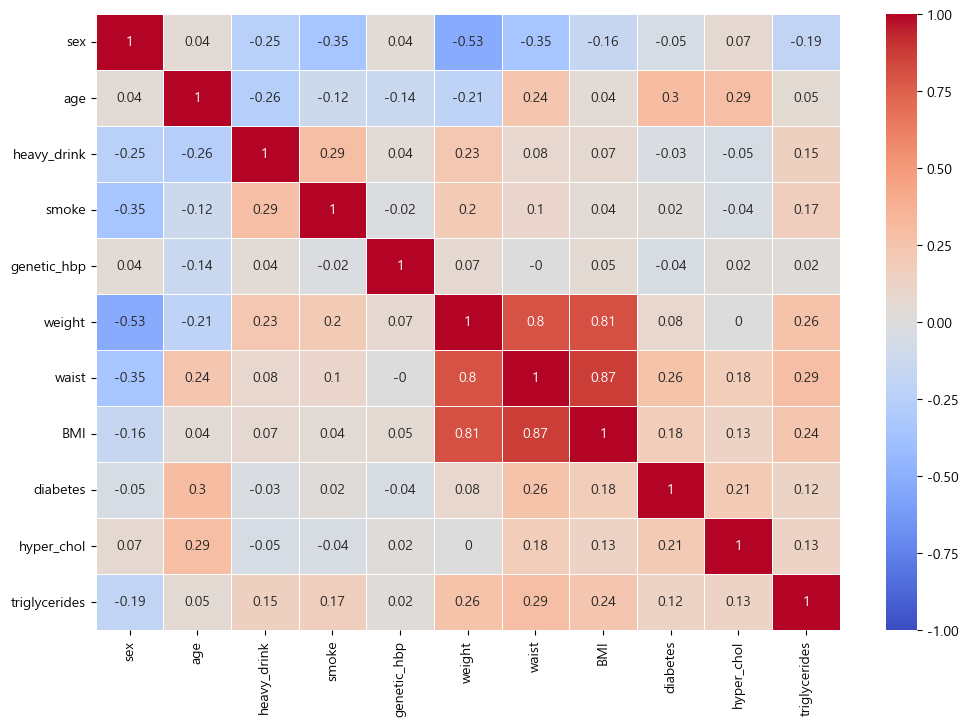

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(feat_corr0.round(2),
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            vmin=-1,
            vmax=1)
plt.show()

In [35]:
drop_list = ['weight','waist']
fix_data = fix_data0.copy()
fix_data = fix_data.drop(columns=drop_list,axis=1)
fix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             11573 non-null  object 
 1   year           11573 non-null  int64  
 2   sex            11573 non-null  int64  
 3   age            11573 non-null  int64  
 4   heavy_drink    11573 non-null  int32  
 5   smoke          11573 non-null  int32  
 6   genetic_hbp    11573 non-null  float64
 7   BMI            11573 non-null  float64
 8   diabetes       11573 non-null  int32  
 9   hyper_chol     11573 non-null  int32  
 10  triglycerides  11573 non-null  float64
 11  HBP_US         11573 non-null  int32  
 12  HBP_EU         11573 non-null  int32  
dtypes: float64(3), int32(6), int64(3), object(1)
memory usage: 904.3+ KB


In [36]:
check_features = fix_data.iloc[:,2:-2]
corr = check_features.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1)

,sex,age,heavy_drink,smoke,genetic_hbp,BMI,diabetes,hyper_chol,triglycerides
sex,1.000000,0.038326,-0.248890,-0.350524,0.040384,-0.157245,-0.051748,0.074212,-0.194612
age,0.038326,1.000000,-0.259724,-0.124239,-0.140292,0.043742,0.297689,0.286857,0.047392
heavy_drink,-0.248890,-0.259724,1.000000,0.287233,0.036807,0.071332,-0.034885,-0.053002,0.154579
smoke,-0.350524,-0.124239,0.287233,1.000000,-0.024376,0.035057,0.016959,-0.038498,0.167180
genetic_hbp,0.040384,-0.140292,0.036807,-0.024376,1.000000,0.054945,-0.044133,0.017839,0.017991
BMI,-0.157245,0.043742,0.071332,0.035057,0.054945,1.000000,0.179504,0.132896,0.243004
diabetes,-0.051748,0.297689,-0.034885,0.016959,-0.044133,0.179504,1.000000,0.211524,0.116015
hyper_chol,0.074212,0.286857,-0.053002,-0.038498,0.017839,0.132896,0.211524,1.000000,0.125274
triglycerides,-0.194612,0.047392,0.154579,0.167180,0.017991,0.243004,0.116015,0.125274,1.000000


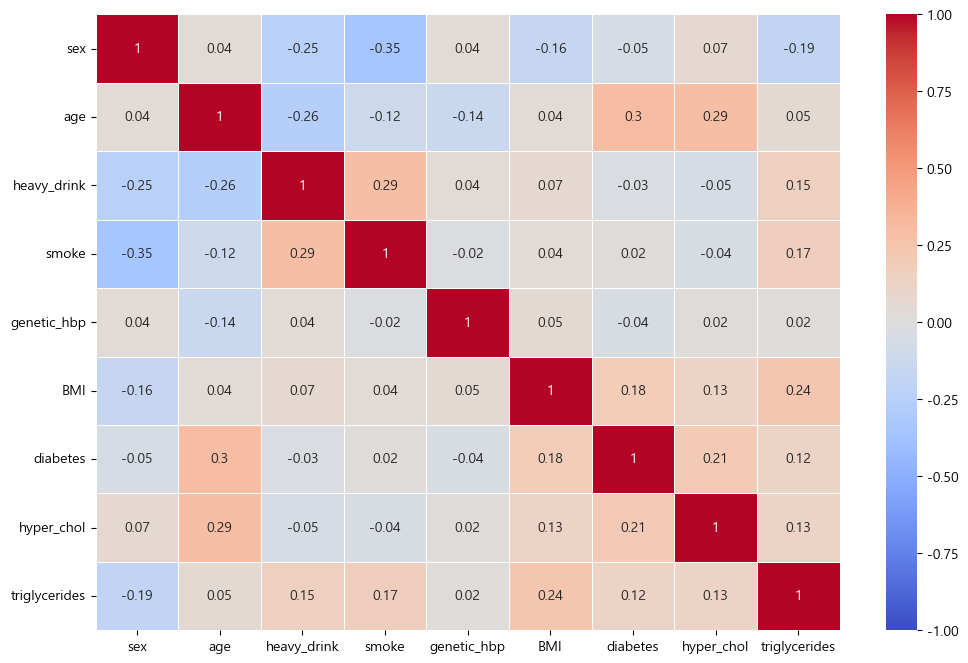

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(corr.round(2),
            cmap='coolwarm',
            annot=True,
            linewidths=.5,
            vmin=-1,
            vmax=1)
plt.show()

## 7. 이상치 제거(노이즈 제거)

In [38]:
fix_data.shape

(11573, 13)

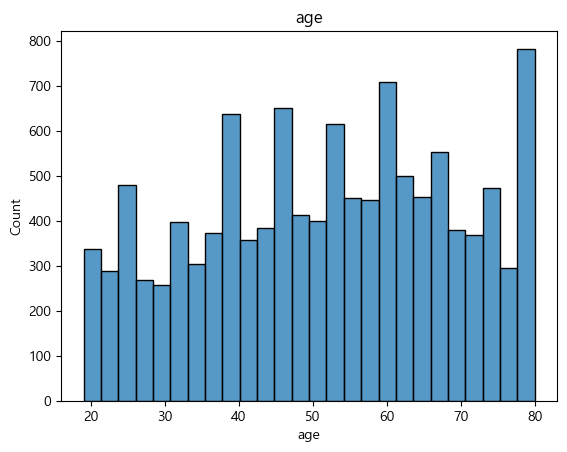

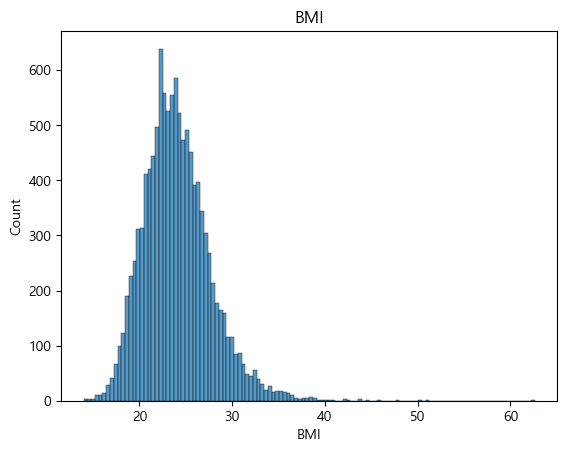

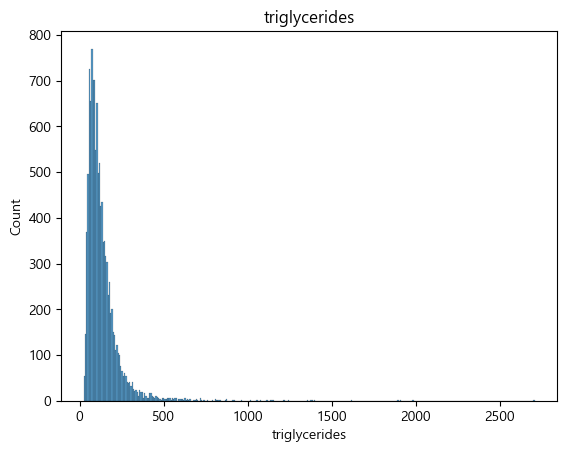

In [39]:
num_cols = ['age','BMI','triglycerides']
for i in num_cols:
    sns.histplot(x=i,data=fix_data)
    plt.title(i)
    plt.show()

이상치 기준 : 심각 수준 이상인 경우
- 체질량지수(BMI)
    - $40kg/m^2$ 이상
- 중성지방(Triglyceride)
    - $500mg/dL$ 이상

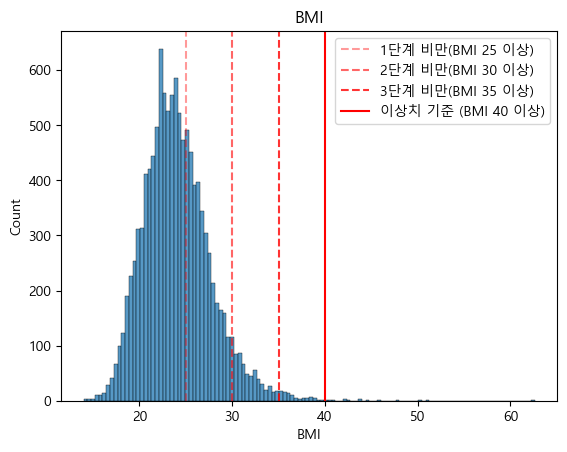

In [40]:
sns.histplot(x='BMI',data=fix_data)
plt.axvline(25,label='1단계 비만(BMI 25 이상)',linestyle='--',color='red',alpha=0.4)
plt.axvline(30,label='2단계 비만(BMI 30 이상)',linestyle='--',color='red',alpha=0.6)
plt.axvline(35,label='3단계 비만(BMI 35 이상)',linestyle='--',color='red',alpha=0.8)
plt.axvline(40,label='이상치 기준 (BMI 40 이상)',linestyle='-',color='red',alpha=1)
plt.legend()
plt.title('BMI')
plt.show()

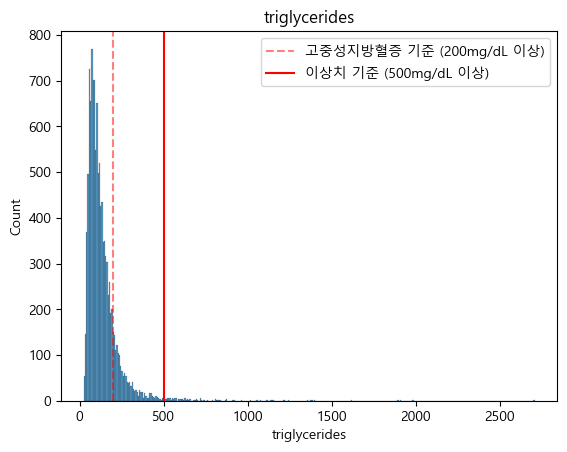

In [41]:
sns.histplot(x='triglycerides',data=fix_data)
plt.axvline(200,label='고중성지방혈증 기준 (200mg/dL 이상)',linestyle='--',color='red',alpha=0.5)
plt.axvline(500,label='이상치 기준 (500mg/dL 이상)',linestyle='-',color='red',alpha=1)
plt.legend()
plt.title('triglycerides')
plt.show()

In [42]:
fix_data.shape

(11573, 13)

In [43]:
outlier_BMI = fix_data.query('BMI >= 40')
len(outlier_BMI)

17

In [44]:
fix_data1 = fix_data.drop(index=outlier_BMI.index).reset_index(drop=True)
fix_data1.shape

(11556, 13)

In [45]:
outlier_chol = fix_data1.query('triglycerides >= 500')
len(outlier_chol)

134

In [46]:
fix_data2 = fix_data1.drop(index=outlier_chol.index).reset_index(drop=True)
fix_data2.shape

(11422, 13)

# 최종 DATA EDA & 저장

In [47]:
final_data = fix_data2.copy()
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11422 entries, 0 to 11421
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             11422 non-null  object 
 1   year           11422 non-null  int64  
 2   sex            11422 non-null  int64  
 3   age            11422 non-null  int64  
 4   heavy_drink    11422 non-null  int32  
 5   smoke          11422 non-null  int32  
 6   genetic_hbp    11422 non-null  float64
 7   BMI            11422 non-null  float64
 8   diabetes       11422 non-null  int32  
 9   hyper_chol     11422 non-null  int32  
 10  triglycerides  11422 non-null  float64
 11  HBP_US         11422 non-null  int32  
 12  HBP_EU         11422 non-null  int32  
dtypes: float64(3), int32(6), int64(3), object(1)
memory usage: 892.5+ KB


In [48]:
profile_final = ProfileReport(final_data,minimal=True)
profile_final

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

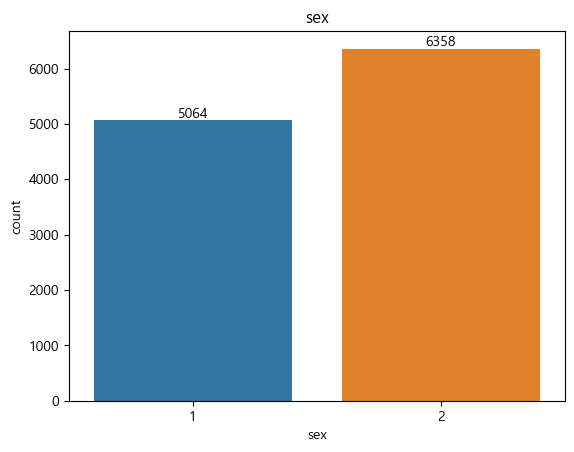

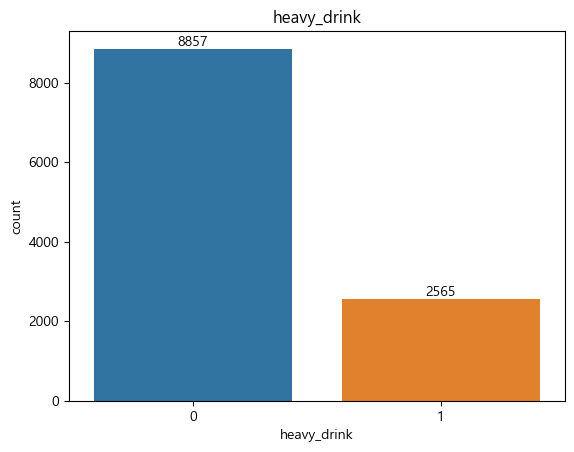

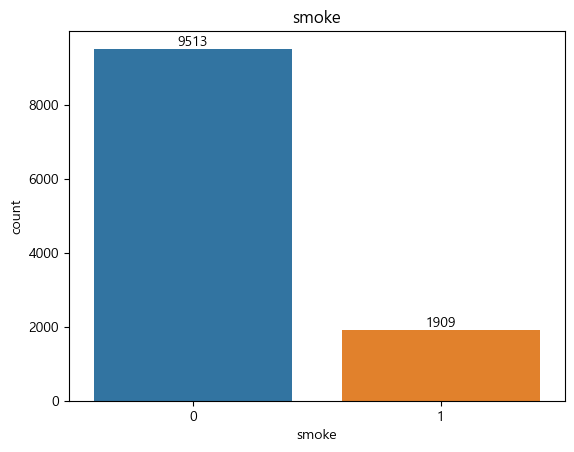

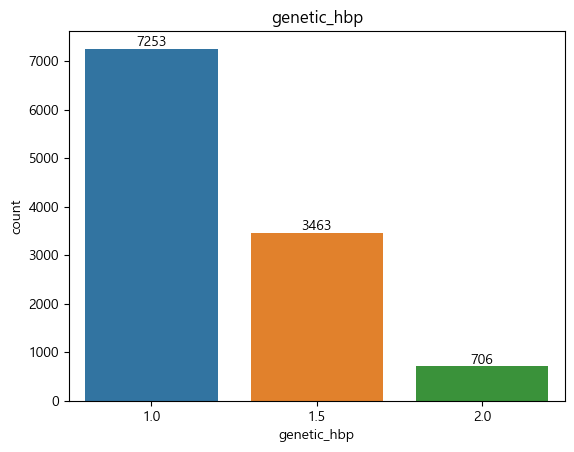

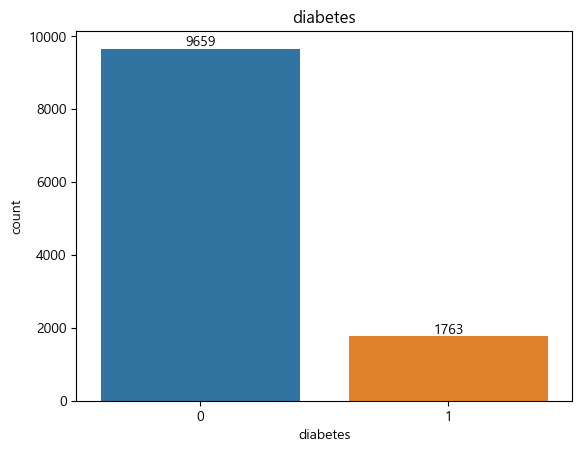

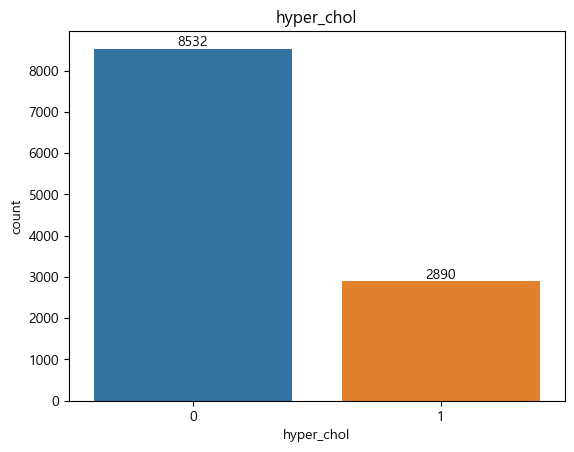

In [49]:
cat_cols = ['sex','heavy_drink','smoke','genetic_hbp','diabetes','hyper_chol']
for i in cat_cols:
    ax = sns.countplot(x=i,data=final_data)
    ax.bar_label(ax.containers[0])
    plt.title(i)
    plt.show()

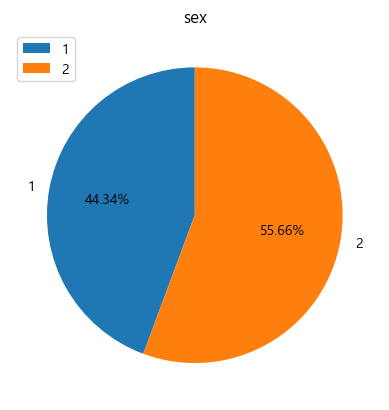

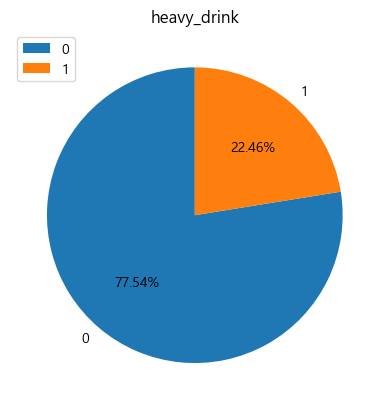

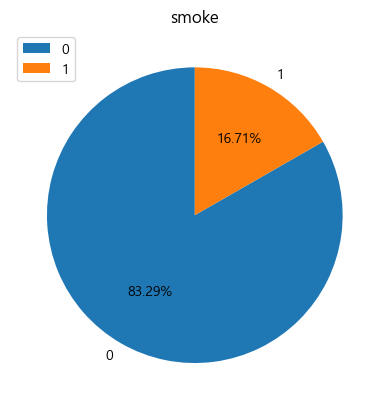

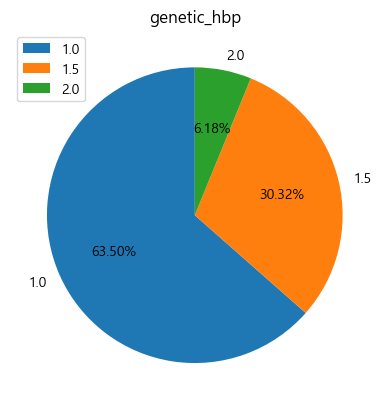

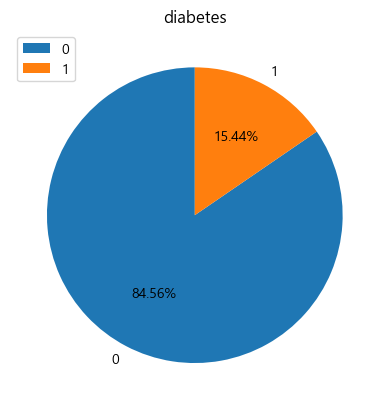

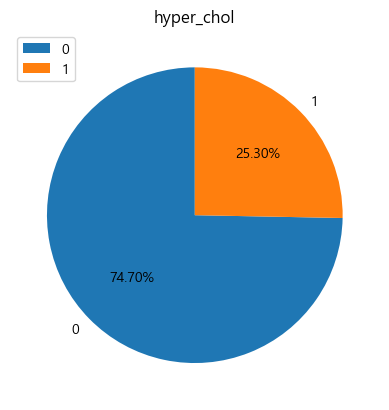

In [50]:
for i in cat_cols:
    count_cat = final_data[i].value_counts().sort_index()
    count_label = count_cat.index
    plt.pie(x = count_cat,labels=count_label,autopct='%.2f%%',startangle=90)
    plt.title(i)
    plt.legend(loc = 'upper left')
    plt.show()

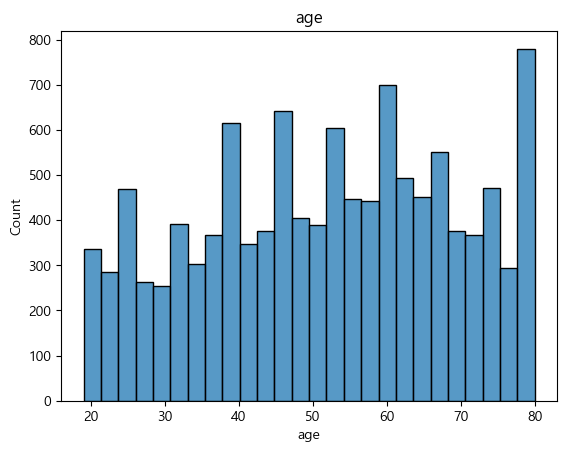

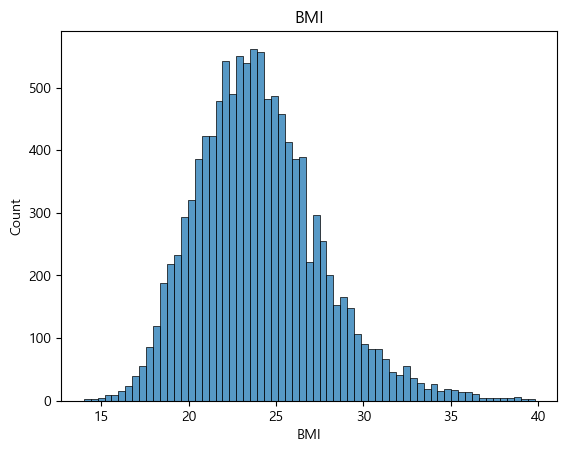

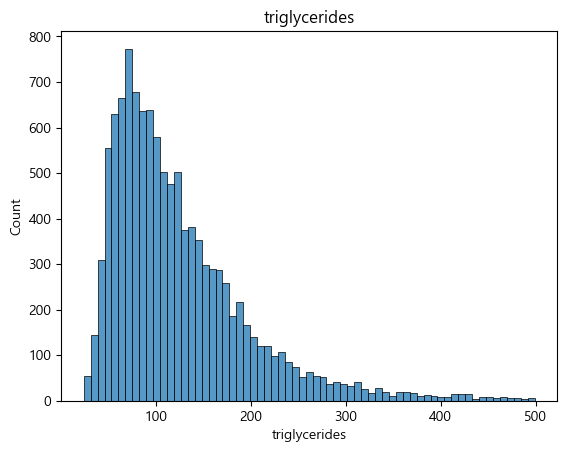

In [51]:
for i in num_cols:
    sns.histplot(x=i,data=final_data)
    plt.title(i)
    plt.show()

,sex,age,heavy_drink,smoke,genetic_hbp,BMI,diabetes,hyper_chol,triglycerides
sex,1.000000,0.035612,-0.243173,-0.347957,0.040761,-0.156856,-0.049934,0.079979,-0.204335
age,0.035612,1.000000,-0.260085,-0.120789,-0.140791,0.058623,0.300801,0.291160,0.093300
heavy_drink,-0.243173,-0.260085,1.000000,0.279649,0.037421,0.068874,-0.038275,-0.060806,0.127194
smoke,-0.347957,-0.120789,0.279649,1.000000,-0.025048,0.026946,0.015162,-0.044809,0.155162
genetic_hbp,0.040761,-0.140791,0.037421,-0.025048,1.000000,0.058389,-0.043711,0.018094,0.024352
BMI,-0.156856,0.058623,0.068874,0.026946,0.058389,1.000000,0.178498,0.135842,0.294075
diabetes,-0.049934,0.300801,-0.038275,0.015162,-0.043711,0.178498,1.000000,0.211217,0.130467
hyper_chol,0.079979,0.291160,-0.060806,-0.044809,0.018094,0.135842,0.211217,1.000000,0.131023
triglycerides,-0.204335,0.093300,0.127194,0.155162,0.024352,0.294075,0.130467,0.131023,1.000000


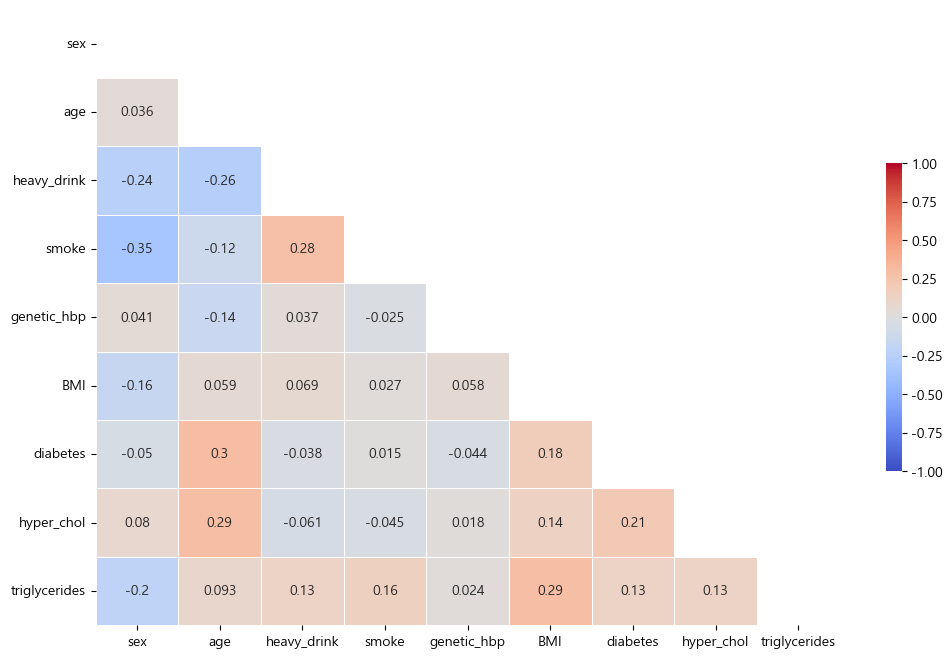

In [52]:
final_feature = final_data.drop(["ID","year","HBP_US","HBP_EU"],axis=1)
corr_final = final_feature.corr(method='pearson')
display(corr_final.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1))
fig, ax = plt.subplots(figsize=(12,8))
mask = np.zeros_like(corr_final,dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_final,
            cmap='coolwarm',
            annot=True,
            mask=mask,
            linewidths=.5,
            cbar_kws={'shrink':.5},
            vmin=-1,
            vmax=1)
plt.show()

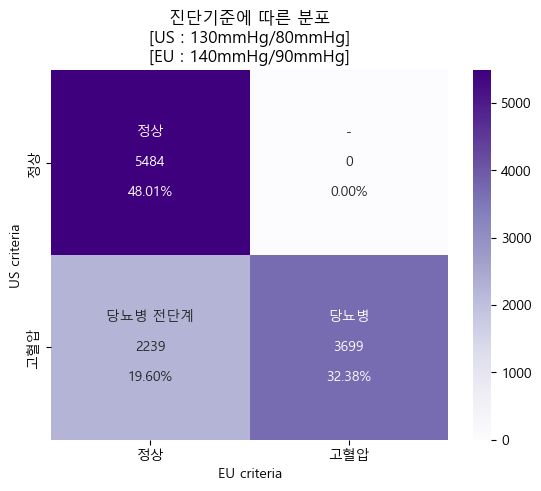

In [54]:
cfm_final = confusion_matrix(final_data.HBP_US,final_data.HBP_EU)
group_names = ['정상','-','당뇨병 전단계','당뇨병']
group_counts = ['{0:0.0f}'.format(value) for value in cfm_final.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cfm_final.flatten()/np.sum(cfm_final)]
labels = [f'{v1}\n\n{v2}\n\n{v3}' for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
tick = ['정상','고혈압']
sns.heatmap(cfm_final, annot=labels, fmt='',cmap='Purples',xticklabels=tick,yticklabels=tick)
plt.xlabel('EU criteria')
plt.ylabel('US criteria')
plt.title('진단기준에 따른 분포\n[US : 130mmHg/80mmHg]\n[EU : 140mmHg/90mmHg]')
plt.show()

Target(HBP_US) 비율


1    0.519874
0    0.480126
Name: HBP_US, dtype: float64

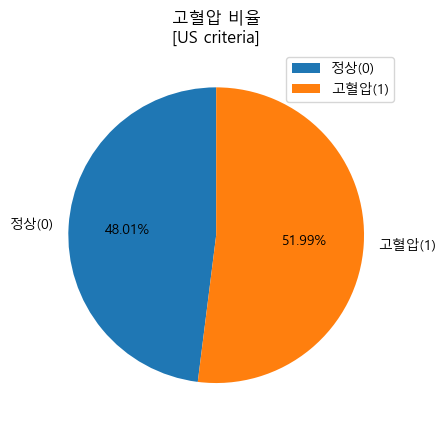

In [57]:
count_us = final_data.HBP_US.value_counts().sort_index()
count_label = ['정상(0)','고혈압(1)']
print('Target(HBP_US) 비율')
display(final_data.HBP_US.value_counts(normalize=True))
plt.pie(x = count_us,labels=count_label,autopct='%.2f%%',startangle=90)
plt.legend(loc = 'upper right')
plt.title('고혈압 비율\n[US criteria]')
plt.show()

Target(HBP_EU) 비율


0    0.676151
1    0.323849
Name: HBP_EU, dtype: float64

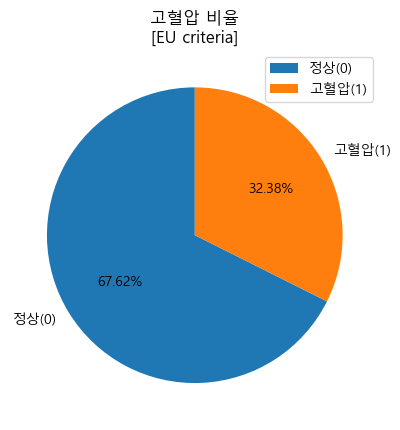

In [58]:
count_eu = final_data.HBP_EU.value_counts().sort_index()
count_label = ['정상(0)','고혈압(1)']
print('Target(HBP_EU) 비율')
display(final_data.HBP_EU.value_counts(normalize=True))
plt.pie(x = count_eu,labels=count_label,autopct='%.2f%%',startangle=90)
plt.legend(loc = 'upper right')
plt.title('고혈압 비율\n[EU criteria]')
plt.show()

In [53]:
final_data.to_csv('data/KNHANES_8th_final2.csv',index=False)